In [1]:
using Plots         # для построения графиков
using LaTeXStrings  # для отображения на графиках подписей с LaTeX-шрифтом (пример: L"E = m c^2")

### Давление газа вдВ

In [2]:
pressure(Vr, Tr) = 8 * Tr / (3 * Vr - 1) - 3 / Vr^2

pressure (generic function with 1 method)

### Примерная бинодаль

В реальности за ней стоит код, подсчитывающий равновесные $V_r$.

In [3]:
approx_binodal(Vr) = - 2 * (Vr - 1)^2 + 1

approx_binodal (generic function with 1 method)

### Холст

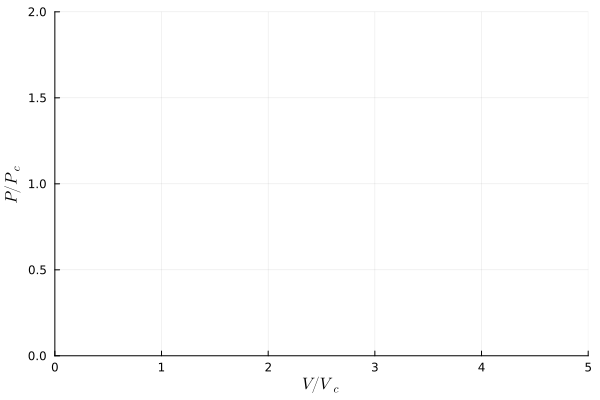

In [4]:
plt = plot(;           # plt (наш холст) сохраняем на будущее для удобства
    ylim=(0, 2),       # ymin ... ymax
    xlim=(0, 5),       # xmin ... xmax
    xlabel=L"V/V_c",   # подпись оси X с LaTeX шрифтом
    ylabel=L"P/P_c",   # подпись оси Y с LaTeX шрифтом
)

### PV-изотермы

Точки без маркеров, соединяются прямыми линиями.
Из-за количества точек график выглядит гладким.

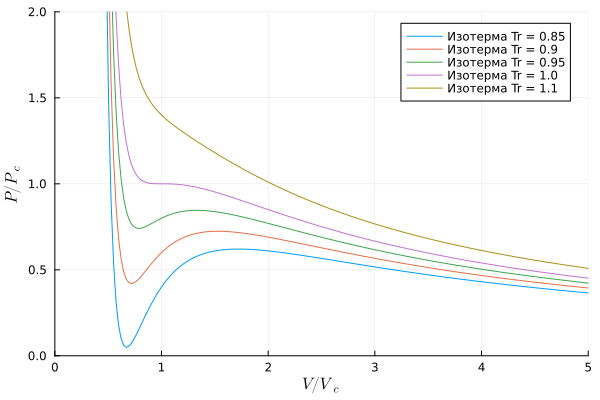

In [5]:
V = range(0.34, 5; length=200)
for Tr in (0.85, 0.9, 0.95, 1.0, 1.1)
    # plot! по умолчанию пишет в глобальный холст
    plot!(V, pressure.(V, Tr);
        label="Изотерма Tr = $(Tr)"  # подпись графика на легенде
    )
end
plt  # для отрисовки в Jupyter

### Точки бинодали (не настоящие)

In [6]:
some_V = V[1:4:end]
approx_binodal_P = approx_binodal.(some_V);

### PV бинодаль

Точки с маркерами, соединяются прямыми линиями.

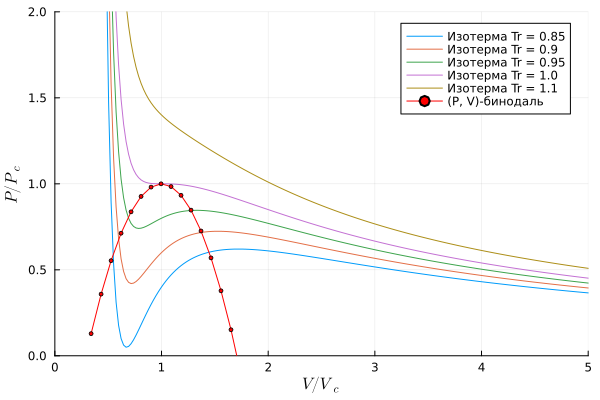

In [7]:
plot!(some_V, approx_binodal_P;
    label="(P, V)-бинодаль",
    marker=(:o, 2),  # маркер типа "кружок" размера 2
    color=:red,      # цвет и линии, и маркера
)

### Покраска области под графиком

Здесь покраска отдельная, чтобы была запись в легенде графика.
Но можно покрасить и сразу в графике выше.

Покраска происходит между графиком функции $f(x)$ и прямой $ y = $ `fillrange`.

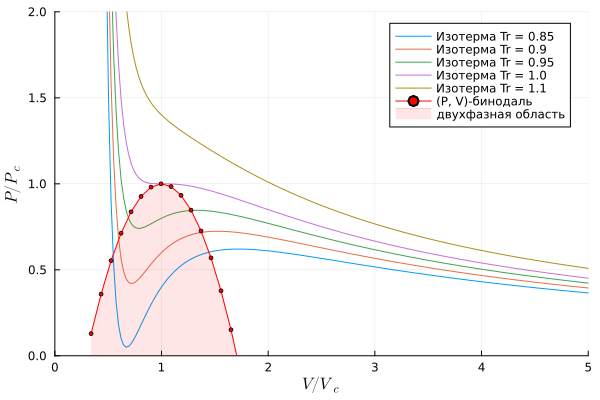

In [8]:
plot!(some_V, approx_binodal_P;
    label="двухфазная область",
    lw=0,           # скрываем границу
    color=:red,
    fillrange=0,    # прямая y = 0, между ней и f(x) всё закрасится
    fillalpha=0.1,  # прозрачность цвета покраски
)